# Introduction to Convolutional Neural Networks and computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The image we're working with are from the Food101 dataset (101 classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak).

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-29 16:47:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  35.8MB/s    in 2.9s    

2023-03-29 16:47:33 (35.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of data.

In [2]:
!ls pizza_steak/train

pizza  steak


In [3]:
import os

# Waltk through pizza_steak dir and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in the {dirpath}")

There are 2 directories and 0 images in the pizza_steak
There are 2 directories and 0 images in the pizza_steak/test
There are 0 directories and 250 images in the pizza_steak/test/steak
There are 0 directories and 250 images in the pizza_steak/test/pizza
There are 2 directories and 0 images in the pizza_steak/train
There are 0 directories and 750 images in the pizza_steak/train/steak
There are 0 directories and 750 images in the pizza_steak/train/pizza


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [5]:
# Get the classnames programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names in subdirectory
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images)
  target_folder = target_dir + target_class
  
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
   
  return img

['401979.jpg']
Image shape: (512, 384, 3)


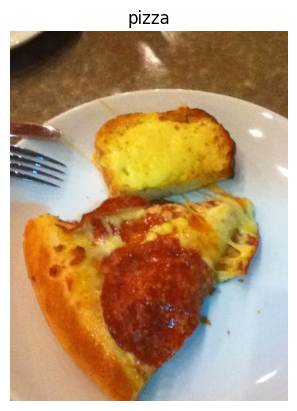

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [8]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[224, 202, 163],
        [231, 209, 170],
        [230, 208, 169],
        ...,
        [111,  79,  32],
        [109,  77,  30],
        [108,  77,  30]],

       [[220, 198, 157],
        [227, 205, 164],
        [226, 204, 165],
        ...,
        [113,  81,  34],
        [113,  81,  34],
        [112,  80,  33]],

       [[219, 197, 156],
        [225, 203, 162],
        [224, 202, 161],
        ...,
        [112,  80,  33],
        [114,  82,  35],
        [111,  79,  32]],

       ...,

       [[193, 160, 129],
        [202, 168, 140],
        [209, 175, 147],
        ...,
        [206, 197, 198],
        [204, 195, 196],
        [203, 194, 195]],

       [[186, 153, 122],
        [194, 161, 130],
        [199, 165, 137],
        ...,
        [206, 197, 198],
        [204, 195, 196],
        [202, 193, 194]],

       [[179, 146, 115],
        [185, 152, 121],
        [188, 154, 126],
        ...,
        [205, 196, 19

In [9]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 384, 3)

In [10]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.87843137, 0.79215686, 0.63921569],
        [0.90588235, 0.81960784, 0.66666667],
        [0.90196078, 0.81568627, 0.6627451 ],
        ...,
        [0.43529412, 0.30980392, 0.1254902 ],
        [0.42745098, 0.30196078, 0.11764706],
        [0.42352941, 0.30196078, 0.11764706]],

       [[0.8627451 , 0.77647059, 0.61568627],
        [0.89019608, 0.80392157, 0.64313725],
        [0.88627451, 0.8       , 0.64705882],
        ...,
        [0.44313725, 0.31764706, 0.13333333],
        [0.44313725, 0.31764706, 0.13333333],
        [0.43921569, 0.31372549, 0.12941176]],

       [[0.85882353, 0.77254902, 0.61176471],
        [0.88235294, 0.79607843, 0.63529412],
        [0.87843137, 0.79215686, 0.63137255],
        ...,
        [0.43921569, 0.31372549, 0.12941176],
        [0.44705882, 0.32156863, 0.1372549 ],
        [0.43529412, 0.30980392, 0.1254902 ]],

       ...,

       [[0.75686275, 0.62745098, 0.50588235],
        [0.79215686, 0.65882353, 0.54901961],
        [0.81960784, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess daat (get all the pixel values between 0 & 1 - normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data fro directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # same as the one above
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 263ms/step - loss: 0.5616 - accuracy: 0.7233 - val_loss: 0.4501 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4410 - accuracy: 0.8007 - val_loss: 0.3494 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4185 - accuracy: 0.8120 - val_loss: 0.3670 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3823 - accuracy: 0.8360 - val_loss: 0.3495 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3667 - accuracy: 0.8547 - val_loss: 0.3194 - val_accuracy: 0.8720


In [12]:
# Epoch 1/5
# 47/47 [==============================] - 147s 3s/step - loss: 0.5660 - accuracy: 0.7047 - val_loss: 0.4572 - val_accuracy: 0.8060


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 228ms/step - loss: 0.7236 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 329ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), our model performs terribly, let's try improving it

In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 228ms/step - loss: 2.9830 - accuracy: 0.6340 - val_loss: 1.4090 - val_accuracy: 0.5760
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 1.1414 - accuracy: 0.6507 - val_loss: 0.7027 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.6497 - accuracy: 0.7293 - val_loss: 0.8512 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.5195 - accuracy: 0.7580 - val_loss: 0.5075 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4643 - accuracy: 0.8020 - val_loss: 0.4256 - val_accuracy: 0.8060


In [17]:
# Get a summary of model_3
model_3.summary() # this one is really bad in comparison with first model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

1. Become one with the data
2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)

### 1. Become one with the data

['203450.jpg']
Image shape: (512, 382, 3)
['2190018.jpg']
Image shape: (512, 512, 3)


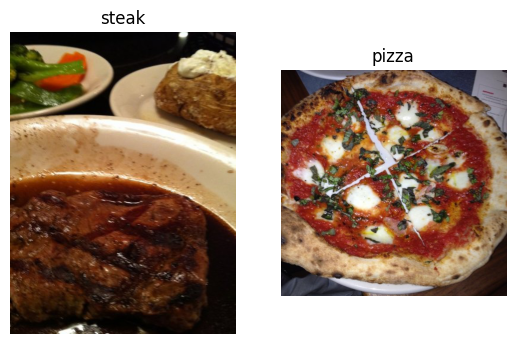

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subste of the data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

In [27]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target dir
                                               target_size=(224, 224), # target size of img
                                               class_mode="binary", # type of data
                                               batch_size=32) # size of minibatches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Get a sample of training data batch
images, labels = train_data.next() # get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [30]:
# How many batches are there?
len(train_data)

47

In [31]:
# Get the first two images
images[:2], images[0].shape,

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

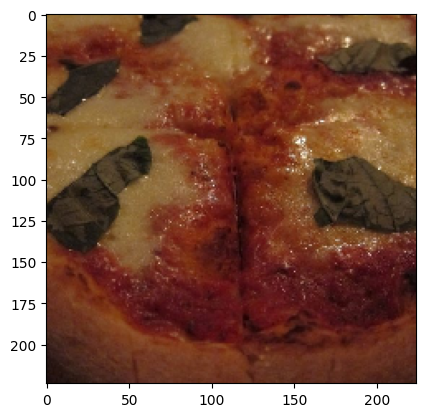

In [34]:
plt.imshow(images[5])

In [35]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline. 

In [36]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [37]:
# Create the model (this will be our baseline, a three layer cnn)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # size of the sliding window going across the input
           strides=1, # size of the step the sliding window takes across the input
           padding="valid", # valid = losses information on edges, "same" - leaves the margin
           activation="relu",
           input_shape=(224, 224, 3)), # input layer shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [38]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
# Get summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [40]:
# Cheeck the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [42]:
#  fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 273ms/step - loss: 0.6465 - accuracy: 0.6053 - val_loss: 0.4995 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 13s 272ms/step - loss: 0.4382 - accuracy: 0.7973 - val_loss: 0.3790 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.2464 - accuracy: 0.9060 - val_loss: 0.3817 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.1177 - accuracy: 0.9680 - val_loss: 0.4129 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 12s 265ms/step - loss: 0.0450 - accuracy: 0.9927 - val_loss: 0.5400 - val_accuracy: 0.7960


### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it

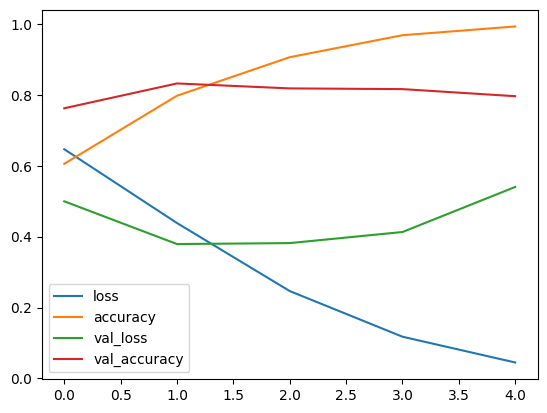

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot loss curve
pd.DataFrame(history_4.history).plot()
plt.legend();

In [45]:
# Plot the validation and training curves separately
def plot_loss(history):
  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  accuracy = history.history["accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

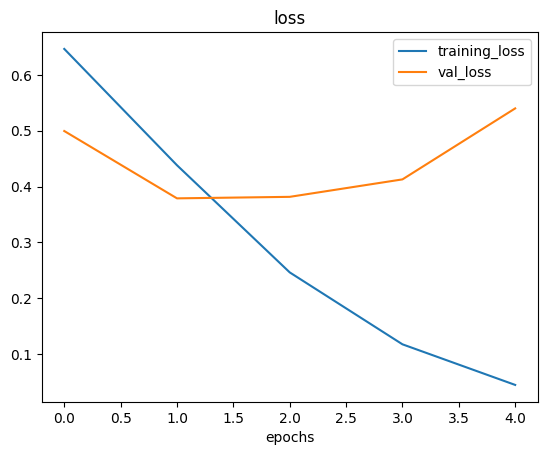

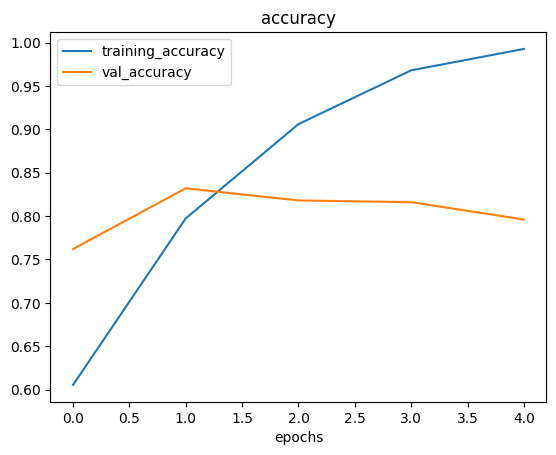

In [47]:
# Check out the loss anda accuracy of model 4
plot_loss(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augumentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

Reducing overfitting is also known as **regularization**

In [48]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [49]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 269ms/step - loss: 0.6114 - accuracy: 0.6607 - val_loss: 0.5116 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 12s 259ms/step - loss: 0.4947 - accuracy: 0.7727 - val_loss: 0.4058 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4183 - accuracy: 0.8113 - val_loss: 0.3372 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4176 - accuracy: 0.8187 - val_loss: 0.3605 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3879 - accuracy: 0.8333 - val_loss: 0.3256 - val_accuracy: 0.8640


In [51]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

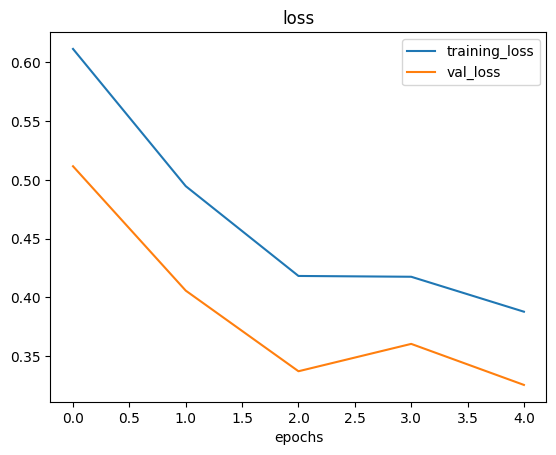

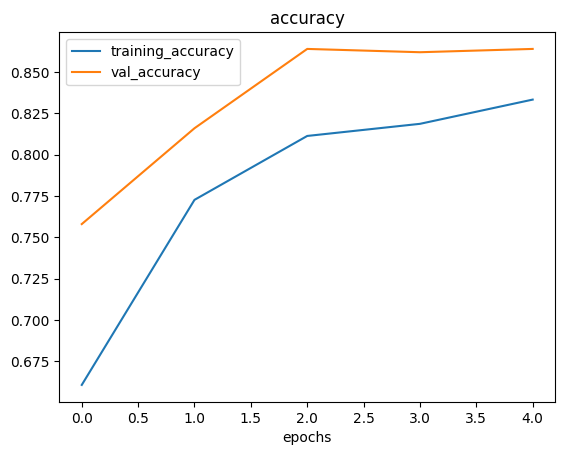

In [52]:
# Plot loss curves
plot_loss(history_5)

### Opening our bag of tricks and finding data augumentation

ImageDataGenerator is deprecated. Let's use another method.

In [65]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data import Dataset
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Create sequence with data augumentation
data_augumentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    # RandomRotation(0.2),
    RandomZoom(0.2, 0.2)
])

In [61]:
# Create the model
model_6 = Sequential([
    data_augumentation,
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [62]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [63]:
# Fit the model
history_6 = model_6.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


47/47 [==============================] - 23s 388ms/step - loss: 0.6395 - accuracy: 0.6473 - val_loss: 0.5216 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 15s 321ms/step - loss: 0.4870 - accuracy: 0.7760 - val_loss: 0.4303 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 15s 322ms/step - loss: 0.4421 - accuracy: 0.8020 - val_loss: 0.4222 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 16s 347ms/step - loss: 0.4355 - accuracy: 0.8107 - val_loss: 0.4123 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 15s 319ms/step - loss: 0.3987 - accuracy: 0.8253 - val_loss: 0.4119 - val_accuracy: 0.8080
